In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, find_max, load_spectral_types, inv_simple, inv_standard

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Vo

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
c = 0.5*(c1+c2)
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC", "mond", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/mond/data'

In [111]:
mond_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
mond_2_files.sort()
mond_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-0.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-1.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-10.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-11.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-12.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-2.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-3.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-4.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-5.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-6.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-7.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-8.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-9.npy']

## tes

In [13]:
index = 2
df = np.load(join(mcmc_dm_dir, f"chain-2-{index}.npy"))
df.shape

(20000, 68, 33)

In [115]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = len(rhob)
mu0 = df[:, :, 24].reshape(-1)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

rhoD = rhob*(1/mu0-1)

# plot

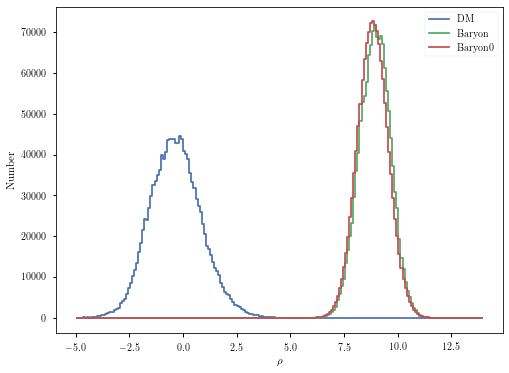

In [86]:
rho = np.linspace(-5, 14, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [87]:
rhoD_sample = np.random.choice(rhoD, size=2000, replace=False)
rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=2000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((1.1680240144869116, -1.1816661339643344, 1.509168667153653),
 (9.414962702646877e-05, 9.00287930697689, 0.7292296065563879),
 (8.893544564179065, 0.7335122254673094))

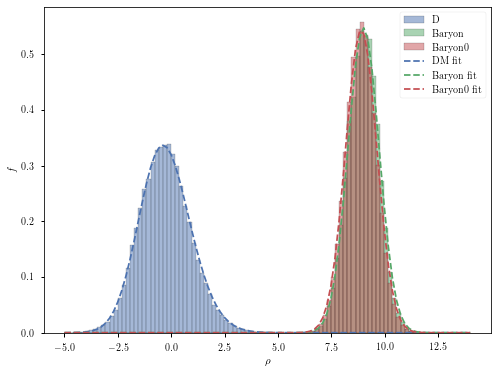

In [89]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='D', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoD_fit, rhob_fit, rhob0_fit

rhoDM = -0.39 +1.22/-1.15
rhob = 9.00 +0.74/-0.73
rhob0 = 8.89 +0.73/-0.73


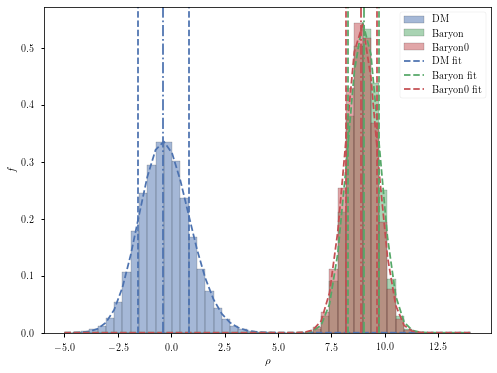

In [90]:
rhoD_low, rhoD_high = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), perc=0.68, res=1E3, min=-5, max=14)
rhoD_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_fit), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


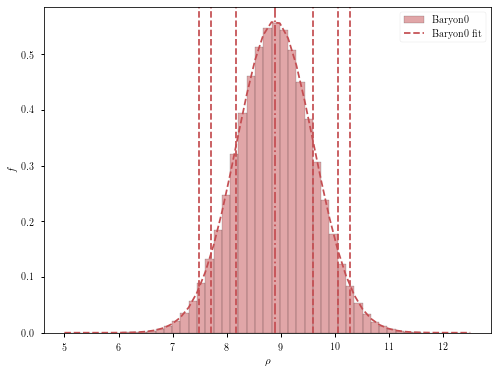

In [91]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [92]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for index in tqdm(range(len(mond_2_files))):
    df = np.load(mond_2_files[index])
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    mu0 = df[:, :, 24].reshape(-1)
    rhoD = rhob*(1/mu0-1)
    print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=2000, replace=False)
    rhoD_fit = skewnorm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoD_low = {}
    rhoD_high = {}
    rhob_low = {}
    rhob_high = {}
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), perc=sigma, res=1E3, min=-5, max=15)
        rhoD_low[i] = low
        rhoD_high[i] = high
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
        rhob_low[i] = low
        rhob_high[i] = high
    print("calculating mode")
    rhoD_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_fit), x0=0.0)[0]
    rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
    rhoD_modes.append(rhoD_mode)
    rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
    rhob_modes.append(rhob_mode)
    rhob_errs.append({'low': rhob_low, 'high': rhob_high})

  0%|          | 0/13 [00:00<?, ?it/s]

fitting...
calculating HDI...


  8%|▊         | 1/13 [00:09<01:48,  9.07s/it]

calculating mode
fitting...
calculating HDI...


 15%|█▌        | 2/13 [00:15<01:23,  7.57s/it]

calculating mode
fitting...
calculating HDI...


 23%|██▎       | 3/13 [00:21<01:10,  7.04s/it]

calculating mode
fitting...
calculating HDI...


 31%|███       | 4/13 [00:27<00:57,  6.44s/it]

calculating mode
fitting...
calculating HDI...


 38%|███▊      | 5/13 [00:33<00:49,  6.13s/it]

calculating mode
fitting...
calculating HDI...


 46%|████▌     | 6/13 [00:38<00:42,  6.02s/it]

calculating mode
fitting...
calculating HDI...


 54%|█████▍    | 7/13 [00:44<00:35,  5.96s/it]

calculating mode
fitting...
calculating HDI...


 62%|██████▏   | 8/13 [00:51<00:30,  6.12s/it]

calculating mode
fitting...
calculating HDI...


 69%|██████▉   | 9/13 [00:56<00:23,  5.98s/it]

calculating mode
fitting...
calculating HDI...


 77%|███████▋  | 10/13 [01:02<00:18,  6.02s/it]

calculating mode
fitting...
calculating HDI...


 85%|████████▍ | 11/13 [01:08<00:11,  5.94s/it]

calculating mode
fitting...
calculating HDI...


 92%|█████████▏| 12/13 [01:14<00:05,  5.85s/it]

calculating mode
fitting...
calculating HDI...


100%|██████████| 13/13 [01:20<00:00,  6.16s/it]

calculating mode


In [93]:
rhoD_fits

[(0.8335678262674135, 0.030849016633562196, 1.430895928329184),
 (1.1307868887371515, -1.992367268820678, 2.0861521065329116),
 (-0.7208166869499554, -0.731561180674998, 1.0792595288497122),
 (0.9827483836297326, -1.4280799103417188, 0.9996279017086722),
 (0.00017746609100301267, 0.21094645604268086, 1.0169581336630724),
 (1.28999484474815, -1.2078619936714263, 1.520815325297408),
 (0.9977936772997982, 1.3854935366995083, 1.3548078219716906),
 (0.4716228204304181, 2.2804746726399148, 1.206881085295189),
 (0.7476813115861602, -0.6004963946239108, 1.1073152543000202),
 (1.3864799627820643, -1.5208987700409273, 1.1758785249829509),
 (0.6778150272240402, -2.2393412874216367, 0.9033186752821092),
 (0.5252264262153981, -1.2071956658048413, 0.9002092537075286),
 (0.49165899644594613, -1.2590435696325446, 0.9081114360042737)]

(-2.0, 3.0)

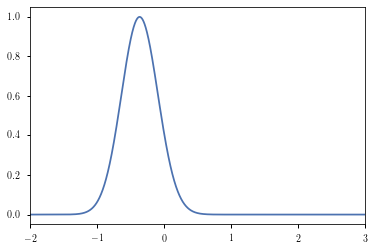

In [94]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = skewnorm.logpdf(rho, *p)
    else:
        log_rhoD += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find max value
rho_max = np.max(rhoD_com)
# normalize
rhoD_com /= rho_max
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-2,3)

In [95]:
from scipy.optimize import curve_fit

def skewpdf(x, a, loc, scale, alpha):
    return a * skewnorm.pdf(x, loc=loc, scale=scale, a=alpha)

rhoD_com_fit_un, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[2, 1, 1.0, 2.0])
rhoD_com_fit_un

array([ 0.6839197 , -0.47222903,  0.29291664,  0.50967908])

(-2.0, 3.0)

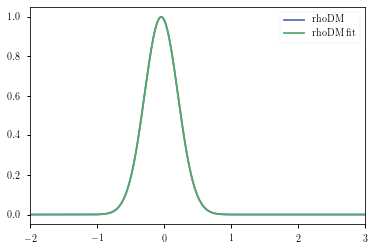

In [26]:
plt.plot(rho, rhoD_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit_un), label='rhoDM fit')
plt.legend()
plt.xlim(-2,3)

In [96]:
rhoD_com_fit = rhoD_com_fit_un[1:]
rhoD_com_low = {}
rhoD_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_com_fit), perc=sigma, res=1E3, min=-1, max=1)
    rhoD_com_low[i] = low
    rhoD_com_high[i] = high
rhoD_com_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_com_fit), x0=0.0)[0]

In [97]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [31]:
for i in range(len(c)):
    print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

$-0.1\leq c < 0.04$ & 0.87 & [-0.44,2.34] & [-1.23,3.41] & [-1.60,3.94] \\
$0.04\leq c < 0.1$ & 1.54 & [0.34,2.87] & [-0.40,3.82] & [-0.74,4.30] \\
$0.1\leq c < 0.14$ & 1.92 & [0.61,3.39] & [-0.21,4.43] & [-0.59,4.95] \\
$0.14\leq c < 0.18$ & 0.75 & [-0.23,1.77] & [-0.82,2.49] & [-1.12,2.84] \\
$0.18\leq c < 0.21$ & 3.70 & [2.76,4.66] & [2.15,5.29] & [1.85,5.59] \\
$0.21\leq c < 0.24$ & 4.77 & [3.77,5.75] & [3.12,6.39] & [2.80,6.70] \\
$0.24\leq c < 0.27$ & 3.59 & [2.70,4.49] & [2.15,5.10] & [1.88,5.38] \\
$0.27\leq c < 0.29$ & 1.87 & [1.11,2.74] & [0.63,3.35] & [0.42,3.67] \\
$0.29\leq c < 0.32$ & 1.50 & [0.78,2.25] & [0.33,2.76] & [0.10,2.99] \\
$0.32\leq c < 0.34$ & 0.77 & [0.14,1.41] & [-0.28,1.81] & [-0.49,2.02] \\
$0.34\leq c < 0.36$ & 0.79 & [0.15,1.43] & [-0.25,1.85] & [-0.44,2.06] \\
$0.36\leq c < 0.38$ & 1.04 & [0.44,1.68] & [0.08,2.13] & [-0.09,2.36] \\
$0.38\leq c < 0.4$ & 0.77 & [0.12,1.47] & [-0.28,1.96] & [-0.47,2.21] \\


In [98]:
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

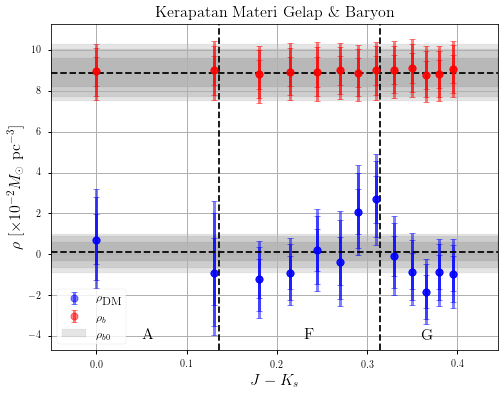

0.12418750000000009

In [101]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err['low'][i] for err in rhoD_errs])
    high = np.array([err['high'][i] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err['low'][i] for err in rhob_errs])
    high = np.array([err['high'][i] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    ax.fill_between(cs, rhoD_com_low[i], rhoD_com_high[i], color='black', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$'],
                  loc='lower left', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -4.2, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -4.2, r'$\textup{F}$', fontsize=16)
ax.text(0.36, -4.2, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
# fig.savefig(join('img', 'rhoDM.pdf'), dpi=300)
plt.show()
rhoD_com_mode

# $a_0$

interpolation function
**Simple**
\begin{aligned}
    \mu(x) = \frac{x}{1+x}
\end{aligned}

**Standard**
\begin{aligned}
    \mu(x) = \sqrt{\frac{x^2}{1+x^2}}
\end{aligned}

## Inverse

**Simple**
\begin{equation*}
    x = \frac{\mu}{1-\mu}
\end{equation*}

**Standard**
\begin{equation*}
    x = \frac{\mu}{\sqrt{1-\mu^2}}
\end{equation*}

In [119]:
def inv_standard(mu):
    mask = mu < 1
    mu_pos = mu[mask]
    mu_neg = mu[~mask]
    real = mu_pos/np.sqrt(1-mu_pos**2)
    im = mu_neg/np.sqrt(mu_neg**2-1)
    return real, im

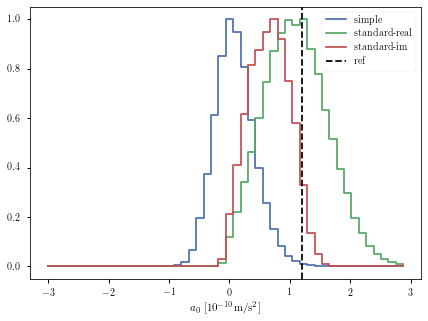

In [122]:
df = np.load(join(mcmc_dm_dir, f"chain-2-{0}.npy"))
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
length = len(rhob)
mu0 = df[:, :, 24].reshape(-1)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

rhoD = rhob*(1/mu0-1)

kz = norm.rvs(loc=2.24, scale=0.02, size=len(mu0))
a = np.linspace(-3, 3, 50)
a_0_simple = kz/inv_simple(mu0)
real, im = inv_standard(mu0)
kz = norm.rvs(loc=2.24, scale=0.02, size=len(real))
a_0_standard_real = kz/real
kz = norm.rvs(loc=2.24, scale=0.02, size=len(im))
a_0_standard_im = kz/im

a_0_simple_num, _ = np.histogram(a_0_simple, bins=a)
a_0_simple_num_real, _ = np.histogram(a_0_simple, bins=a)
a_0_standard_num_real, _ = np.histogram(a_0_standard_real, bins=a)
a_0_standard_num_im, _ = np.histogram(a_0_standard_im, bins=a)

a_0_simple_num = a_0_simple_num/np.max(a_0_simple_num)
a_0_standard_num_real = a_0_standard_num_real/np.max(a_0_standard_num_real)
a_0_standard_num_im = a_0_standard_num_im/np.max(a_0_standard_num_im)

# plot the results
plt.figure(figsize=(7, 5))
plt.step(a[:-1], a_0_simple_num, label="simple")
plt.step(a[:-1], a_0_standard_num_real, label="standard-real")
plt.step(a[:-1], a_0_standard_num_im, label="standard-im")
plt.axvline(1.2, ls="--", color="k", label="ref")
plt.xlabel(r"$a_0$ [$10^{-10}$m/s$^2$]")
plt.legend()
plt.show()

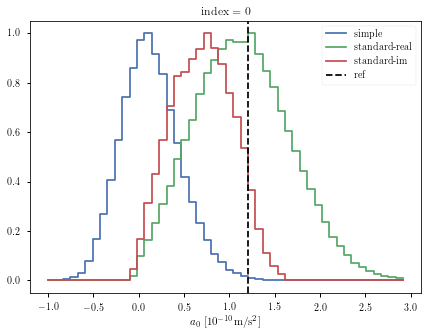

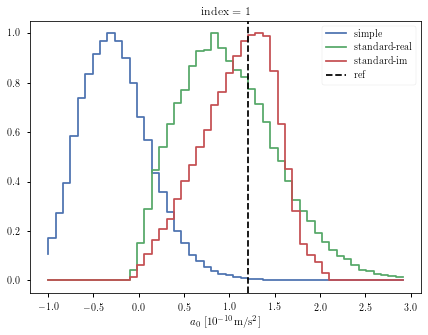

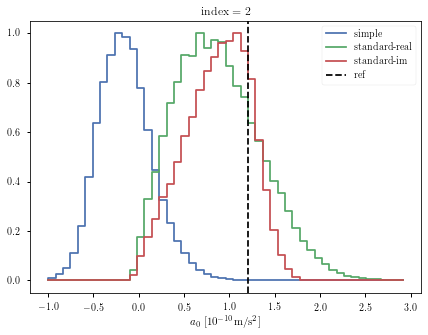

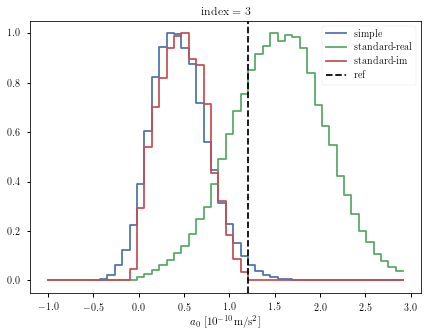

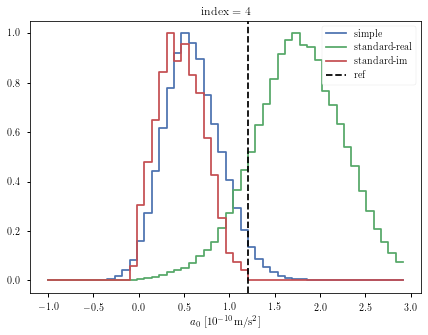

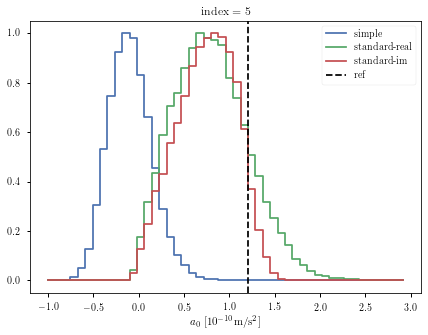

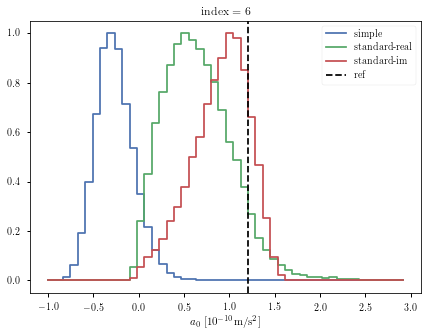

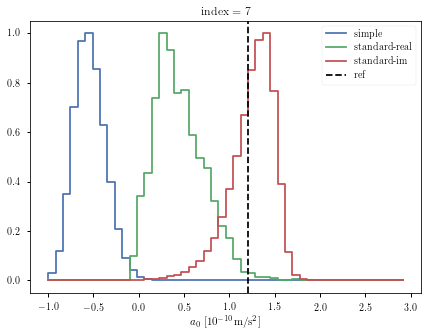

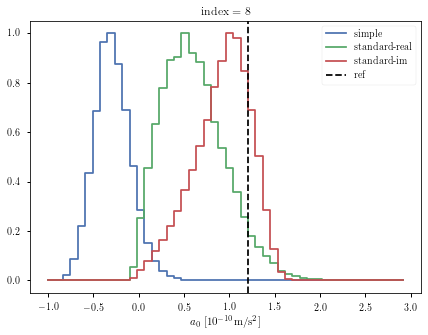

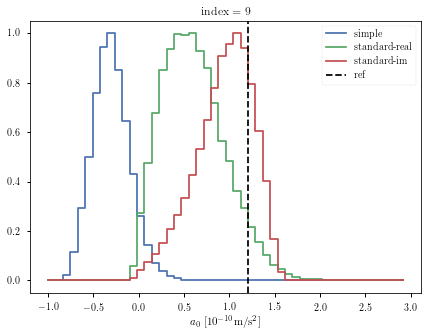

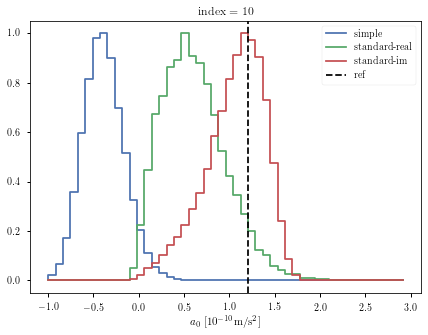

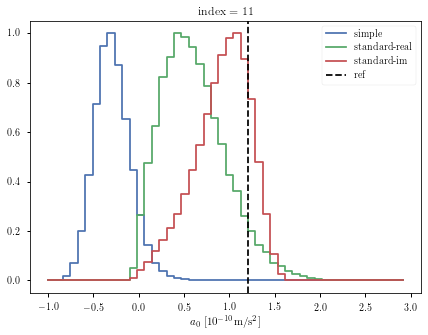

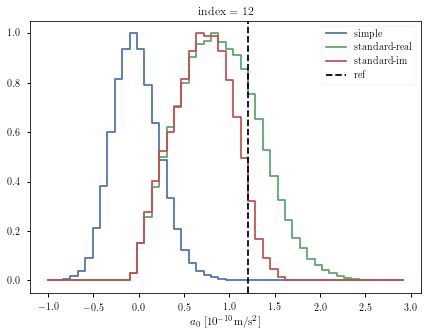

In [124]:
for index, file in enumerate(mond_2_files):
    df = np.load(join(mcmc_dm_dir, f"chain-2-{index}.npy"))
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    length = len(rhob)
    mu0 = df[:, :, 24].reshape(-1)
    rhob0 = np.empty((length, 12))
    for i in range(12):
        rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
    rhob0 = rhob0.sum(axis=1)/1E-2

    rhoD = rhob*(1/mu0-1)
    
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(mu0))
    a = np.linspace(-1, 3, 50)
    a_0_simple = kz/inv_simple(mu0)
    real, im = inv_standard(mu0)
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(real))
    a_0_standard_real = kz/real
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(im))
    a_0_standard_im = kz/im

    a_0_simple_num, _ = np.histogram(a_0_simple, bins=a)
    a_0_simple_num_real, _ = np.histogram(a_0_simple, bins=a)
    a_0_standard_num_real, _ = np.histogram(a_0_standard_real, bins=a)
    a_0_standard_num_im, _ = np.histogram(a_0_standard_im, bins=a)

    a_0_simple_num = a_0_simple_num/np.max(a_0_simple_num)
    a_0_standard_num_real = a_0_standard_num_real/np.max(a_0_standard_num_real)
    a_0_standard_num_im = a_0_standard_num_im/np.max(a_0_standard_num_im)

    # plot the results
    plt.figure(figsize=(7, 5))
    plt.step(a[:-1], a_0_simple_num, label="simple")
    plt.step(a[:-1], a_0_standard_num_real, label="standard-real")
    plt.step(a[:-1], a_0_standard_num_im, label="standard-im")
    plt.axvline(1.2, ls="--", color="k", label="ref")
    plt.xlabel(r"$a_0$ [$10^{-10}$m/s$^2$]")
    plt.title(f"index = {index}")
    plt.legend()
    plt.show()

In [127]:
a0_simple_dict = []
a0_standard_dict = []

for index, file in enumerate(tqdm(mond_2_files)):
    print(f"index = {index}")
    print(f"file = {file}")
    df = np.load(join(mcmc_dm_dir, f"chain-2-{index}.npy"))
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    length = len(rhob)
    mu0 = df[:, :, 24].reshape(-1)
    rhob0 = np.empty((length, 12))
    for i in range(12):
        rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
    rhob0 = rhob0.sum(axis=1)/1E-2

    rhoD = rhob*(1/mu0-1)
    
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(mu0))
    a = np.linspace(-1, 3, 50)
    a_0_simple = kz/inv_simple(mu0)
    real, im = inv_standard(mu0)
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(real))
    a_0_standard_real = kz/real
    kz = norm.rvs(loc=2.24, scale=0.02, size=len(im))
    a_0_standard_im = kz/im

    a_0_simple_num, _ = np.histogram(a_0_simple, bins=a)
    a_0_simple_num_real, _ = np.histogram(a_0_simple, bins=a)
    a_0_standard_num_real, _ = np.histogram(a_0_standard_real, bins=a)
    a_0_standard_num_im, _ = np.histogram(a_0_standard_im, bins=a)

    a_0_simple_num = a_0_simple_num/np.max(a_0_simple_num)
    a_0_standard_num_real = a_0_standard_num_real/np.max(a_0_standard_num_real)
    a_0_standard_num_im = a_0_standard_num_im/np.max(a_0_standard_num_im)

    # fit skewnorm
    a_0_simple_sample = np.random.choice(a_0_simple, size=2000, replace=False)
    a_0_simple_fit = skewnorm.fit(a_0_simple_sample)
    a_0_standard_real_sample = np.random.choice(a_0_standard_real, size=2000, replace=False)
    a_0_standard_fit_real = skewnorm.fit(a_0_standard_real_sample)
    # find max
    a_0_simple_max = find_max(lambda x: skewnorm.pdf(x, *a_0_simple_fit), x0=0.0)[0]
    a_0_standard_max_real = find_max(lambda x: skewnorm.pdf(x, *a_0_standard_fit_real), x0=0.0)[0]
    # find HDI
    a_0_simple_low = {}
    a_0_simple_high = {}
    a_0_standard_low_real = {}
    a_0_standard_high_real = {}
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: skewnorm.pdf(x, *a_0_simple_fit), perc=sigma, res=1E3, min=-1, max=3)
        a_0_simple_low[i] = low
        a_0_simple_high[i] = high
        low, high = hdi(lambda x: skewnorm.pdf(x, *a_0_standard_fit_real), perc=sigma, res=1E3, min=-1, max=3)
        a_0_standard_low_real[i] = low
        a_0_standard_high_real[i] = high

    a0_simple_dict.append({'max': a_0_simple_max, 'low': a_0_simple_low, 'high': a_0_simple_high, 'fit': a_0_simple_fit})
    a0_standard_dict.append({'max': a_0_standard_max_real, 'low': a_0_standard_low_real, 'high': a_0_standard_high_real, 'fit': a_0_standard_fit_real})

  0%|          | 0/13 [00:00<?, ?it/s]

index = 0
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-0.npy


  8%|▊         | 1/13 [00:56<11:15, 56.33s/it]

index = 1
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-1.npy


 15%|█▌        | 2/13 [01:21<06:58, 38.08s/it]

index = 2
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-10.npy


 23%|██▎       | 3/13 [01:49<05:35, 33.51s/it]

index = 3
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-11.npy


 31%|███       | 4/13 [04:07<11:12, 74.68s/it]

index = 4
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-12.npy


 38%|███▊      | 5/13 [06:07<12:06, 90.87s/it]

index = 5
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-2.npy


 46%|████▌     | 6/13 [06:53<08:50, 75.81s/it]

index = 6
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-3.npy


 54%|█████▍    | 7/13 [07:39<06:35, 65.98s/it]

index = 7
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-4.npy


 62%|██████▏   | 8/13 [08:19<04:49, 57.88s/it]

index = 8
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-5.npy


 69%|██████▉   | 9/13 [08:54<03:22, 50.54s/it]

index = 9
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-6.npy


 77%|███████▋  | 10/13 [09:18<02:07, 42.36s/it]

index = 10
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-7.npy


 85%|████████▍ | 11/13 [09:41<01:12, 36.42s/it]

index = 11
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-8.npy


 92%|█████████▏| 12/13 [10:12<00:34, 34.97s/it]

index = 12
file = /home2/s20321005/Thesis-Project/Data/MCMC/mond/data/chain-2-9.npy


100%|██████████| 13/13 [11:04<00:00, 51.14s/it]


In [128]:
[arr['fit'] for arr in a0_simple_dict]

[(1.6826619632036364, -0.09203236727425149, 0.4495292700432528),
 (1.3463642099354014, -0.5269966104458295, 0.5354416980626409),
 (1.85004876638521, -0.3522443803118399, 0.41828574221986325),
 (1.855522857241966, 0.23560572753022962, 0.4381165047139446),
 (1.6439677382182087, 0.3847907240695619, 0.4364543849845534),
 (1.711855738610327, -0.23791045584209558, 0.3293793647235117),
 (2.021986456654772, -0.39554123161757015, 0.3046038114427986),
 (1.6354224343179895, -0.6177055990762781, 0.23792078250280135),
 (1.6240518440851757, -0.3911397273756029, 0.2752308391784055),
 (1.714047640230854, -0.4155570568280199, 0.28276155504958467),
 (1.5084914534559304, -0.502643500289154, 0.3027811001140913),
 (1.8244020635688822, -0.4005898601568821, 0.27966168835547334),
 (1.5603408402820746, -0.1765166647322018, 0.34991432373072584)]

(-0.5, 0.5)

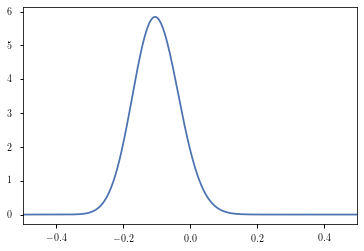

In [194]:
from scipy.integrate import simps

# multiplying the rhoDM, but it became addition in log
a = np.linspace(-1, 3, 10000)
log_a_simple = None
for p in [arr['fit'] for arr in a0_simple_dict]:
    if log_a_simple is None:
        log_a_simple = skewnorm.logpdf(a, *p)
    else:
        log_a_simple += skewnorm.logpdf(a, *p)
# turn into rhoDM
a_simple_com = np.exp(log_a_simple)
# find area
area = simps(a_simple_com, a)
# normalize
a_simple_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(a, a_simple_com, label='simple')
ax.set_xlim(-0.5,0.5)

(0.0, 2.0)

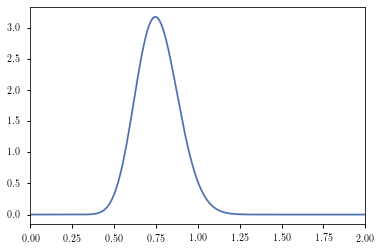

In [195]:
from scipy.integrate import simps

# multiplying the rhoDM, but it became addition in log
a = np.linspace(-1, 3, 10000)
log_a_standard = None
for p in [arr['fit'] for arr in a0_standard_dict]:
    if log_a_standard is None:
        log_a_standard = skewnorm.logpdf(a, *p)
    else:
        log_a_standard += skewnorm.logpdf(a, *p)
# turn into rhoDM
a_standard_com = np.exp(log_a_standard)
# find area
area = simps(a_standard_com, a)
# normalize
a_standard_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(a, a_standard_com, label='standard')
ax.set_xlim(0,2)

(array([ 0.88250016, -0.14356526,  0.08073697]),
 -0.10456250000000003,
 {0: -0.1711711711711712, 1: -0.21621621621621623, 2: -0.23423423423423406},
 {0: -0.027027027027027195, 1: 0.018018018018017834, 2: 0.03603603603603567})

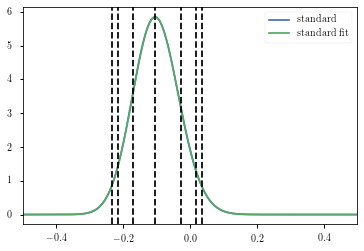

In [204]:
a_simple_com_fit, _ = curve_fit(skewnorm.pdf, a, a_simple_com, p0=[1,1,1])

a_simple_com_low = {}
a_simple_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *a_simple_com_fit), perc=sigma, res=1E3, min=-4, max=5)
    a_simple_com_low[i] = low
    a_simple_com_high[i] = high
a_simple_com_mode = find_max(lambda x: skewnorm.pdf(x, *a_simple_com_fit), x0=0.0)[0]
fig, ax = plt.subplots()
ax.plot(a, a_simple_com, label='standard')
ax.plot(a, skewnorm.pdf(a, *a_simple_com_fit), label='standard fit')
ax.axvline(a_simple_com_mode, color='black', linestyle='--')
for i in range(3):
    ax.axvline(a_simple_com_low[i], color='black', linestyle='--')
    ax.axvline(a_simple_com_high[i], color='black', linestyle='--')
ax.legend()
ax.set_xlim(-0.5,0.5)
a_simple_com_fit, a_simple_com_mode, a_simple_com_low, a_simple_com_high

(array([1.19838096, 0.66104803, 0.16042946]),
 0.7460625000000007,
 {0: 0.6216216216216219, 1: 0.5495495495495497, 2: 0.5135135135135132},
 {0: 0.8738738738738743, 1: 0.9729729729729728, 2: 1.0180180180180178})

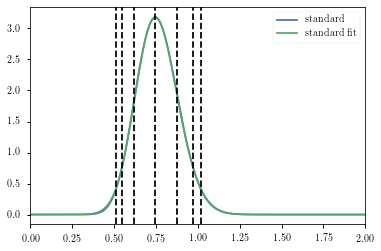

In [206]:
a_standard_com_fit, _ = curve_fit(skewnorm.pdf, a, a_standard_com, p0=[1,1,1])

a_standard_com_low = {}
a_standard_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *a_standard_com_fit), perc=sigma, res=1E3, min=-4, max=5)
    a_standard_com_low[i] = low
    a_standard_com_high[i] = high
a_standard_com_mode = find_max(lambda x: skewnorm.pdf(x, *a_standard_com_fit), x0=0.0)[0]
fig, ax = plt.subplots()
ax.plot(a, a_standard_com, label='standard')
ax.plot(a, skewnorm.pdf(a, *a_standard_com_fit), label='standard fit')
ax.axvline(a_standard_com_mode, color='black', linestyle='--')
for i in range(3):
    ax.axvline(a_standard_com_low[i], color='black', linestyle='--')
    ax.axvline(a_standard_com_high[i], color='black', linestyle='--')
ax.legend()
ax.set_xlim(0,2)
a_standard_com_fit, a_standard_com_mode, a_standard_com_low, a_standard_com_high

In [207]:
c

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [213]:
np.array([arr['max'] for arr in a0_simple_dict])

array([ 0.1513125, -0.2384375, -0.1276875,  0.4706875,  0.621375 ,
       -0.0598125, -0.2341875, -0.48875  , -0.241875 , -0.262625 ,
       -0.338375 , -0.25025  ,  0.013375 ])

In [216]:
a_standard_com_mode

0.7460625000000007

array([0.13 , 0.05 , 0.035, 0.03 , 0.025, 0.02 , 0.02 , 0.02 , 0.02 ,
       0.015, 0.015, 0.015])

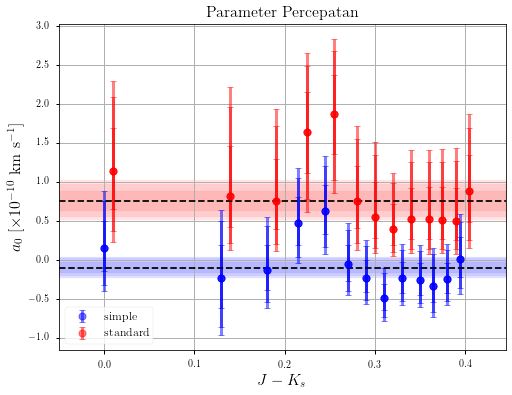

0.12418750000000009

In [229]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)
dc = c2-c1

fig, ax = plt.subplots(figsize=(8, 6))
a_simple_modes = np.array([err['max'] for err in a0_simple_dict])
a_standard_modes = np.array([err['max'] for err in a0_standard_dict])
for i in range(3):
    low = np.array([err['low'][i] for err in a0_simple_dict])
    high = np.array([err['high'][i] for err in a0_simple_dict])    
    simple_ax = ax.errorbar(c, a_simple_modes, yerr=[a_simple_modes-low, high-a_simple_modes], fmt='o', 
                        color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err['low'][i] for err in a0_standard_dict])
    high = np.array([err['high'][i] for err in a0_standard_dict])
    standard_ax = ax.errorbar(c+0.01, a_standard_modes, yerr=[a_standard_modes-low, high-a_standard_modes], fmt='o', 
                        color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    
    ax.fill_between(cs, a_simple_com_low[i], a_simple_com_high[i], color='blue', alpha=0.1)
    ax.fill_between(cs, a_standard_com_low[i], a_standard_com_high[i], color='red', alpha=0.1)
    if i == 2:
        ax.legend([simple_ax, standard_ax], 
                  ['simple', 'standard'],
                  loc='lower left', fontsize=12)
# real value
ax.axhline(y=a_simple_com_mode, color='black', linestyle='--')
ax.axhline(y=a_standard_com_mode, color='black', linestyle='--')
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$a_0$ [$\times 10^{-10}$ km s$^{-1}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Parameter Percepatan", fontsize=16)
ax.grid()
# fig.savefig(join('img', 'rhoDM.pdf'), dpi=300)
plt.show()
rhoD_com_mode